## The data figure we want to reproduce (from [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3039263/figure/fig01/))

![data-figure](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3039263/bin/tjp0589-0101-f1.jpg)

In [1]:
%matplotlib inline

# Built-in libs
import os
import sys
import warnings

# Common libs
import matplotlib.pyplot as plt
import quantities as pq

# Open Worm libs
import owtests
import c302

# Testing libs
warnings.simplefilter('ignore')
import sciunit
from neuronunit.tests import APWidthTest,APAmplitudeTest
from c302.muscleunit import vm_plot,models as sciunit_models

In [2]:
# Create a MuscleModel instance with a particular configuration
# This model has a neuron and a muscle cell
model = sciunit_models.MuscleModel('IClampBWM', 'C2', 1000, 0.05, config_package="notebooks.configs")

Set default parameters for C
Set default parameters for C2
Opened file: /home/rgerkin/Dropbox (ASU)/dev/openworm/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/rgerkin/Dropbox (ASU)/dev/openworm/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MDR01 at (80,-270,80)
c302      >>>  Writing generated network to: /home/rgerkin/Dropbox (ASU)/dev/openworm/CElegansNeuroML/CElegans/pythonScripts/c302/examples/c302_C2_IClampBWM.nml
(Re)written network file to: /home/rgerkin/Dropbox (ASU)/dev/openworm/CElegansNeuroML/CElegans/pythonScripts/c302/examples/c302_C2_IClampBWM.nml


In [3]:
# Dictionary of observations, in this case two ephys properties from one paper
doi = 'doi:10.1113/jphysiol.2010.200683'
observations={doi:{'ap_amplitude':{'mean':45.1*pq.mV,
                                   'sem':0.7*pq.mV,
                                   'n':25},
                   'ap_width':{'mean':19.7*pq.ms,
                               'sem':1.0*pq.ms,
                               'n':25}}}    

# Instantiate two tests based on these properties
ap_width_test = APWidthTest(observation=observations[doi]['ap_width'])
ap_amplitude_test = APAmplitudeTest(observation=observations[doi]['ap_amplitude'])

# Put them together in a test suite
ap_tests = sciunit.TestSuite([ap_width_test,ap_amplitude_test], name="AP Tests")

In [4]:
# Judge the membrane potential of the muscle 
# One could judge the neuron instead with appropriate keyword parameters, see below)
%time score_matrix = ap_tests.judge(model) 
import pandas as pd
score_matrix.style.set_properties(**{'font-size':'16pt'})
score_matrix

pyNeuroML >>> Reloading data specified in LEMS file: /tmp/tmp7tkd06go/LEMS_c302_C2_IClampBWM.xml (/tmp/tmp7tkd06go/LEMS_c302_C2_IClampBWM.xml), base_dir: /tmp/tmpzzwaph8h, cwd: /home/rgerkin/Dropbox (ASU)/dev/openworm/tests/owtests


CPU times: user 653 ms, sys: 10.3 ms, total: 664 ms
Wall time: 5.16 s


/home/rgerkin/miniconda3/lib/python3.6/site-packages/bs4/builder/_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)


,APWidthTest,APAmplitudeTest
LEMS_c302_C2_IClampBWM,Z = -3.06,Z = -11.03


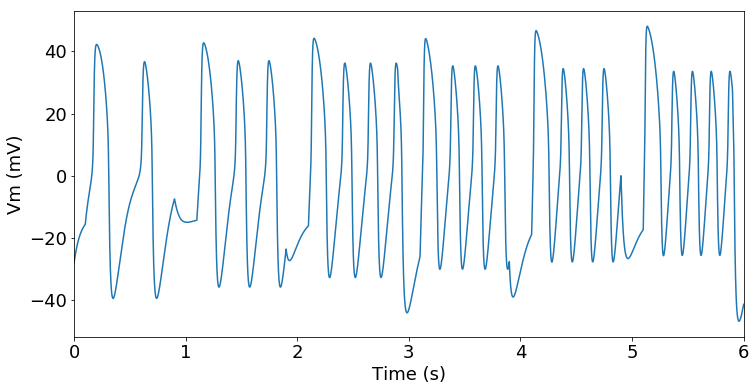

In [5]:
# Plot the model output for one of the tests
import matplotlib as mpl
mpl.rcParams.update({'font.size':18})
plt.figure(figsize=(12,6))
score_matrix['APWidthTest']['LEMS_c302_C2_IClampBWM'].plot_vm()
plt.savefig('model.pdf')

## Model methods could also be run directly as follows

In [6]:
# These will use the cached results and so be much faster than the original run
%time neuron_vm = model.get_membrane_potential_neuron()
%time muscle_vm = model.get_membrane_potential_muscle()

CPU times: user 21.9 ms, sys: 22.8 ms, total: 44.7 ms
Wall time: 14.8 ms
CPU times: user 18 ms, sys: 24.9 ms, total: 42.9 ms
Wall time: 14.4 ms


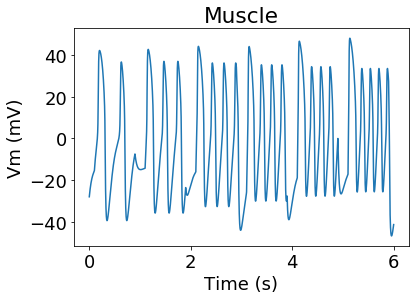

In [7]:
# Another way to plot the model output, in this case by cell type
vm_plot(muscle_vm,"Muscle")

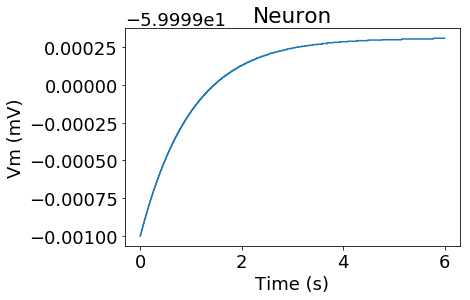

In [8]:
# Same as above, but for a different cell type in this model
# Note that in this flavor of the model, the neuron isn't doing anything at all, 
# and the muscle cell is firing spontaneously
vm_plot(neuron_vm,"Neuron")